## Problem Statement:
     The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 
     It gives you information about multiple people like their ages, sexes, sibling counts, 
     embarkment points, and whether or not they survived the disaster. Based on these features,
     you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
# importing required library

import pandas as pd
import numpy as np

#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#Maths
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

#ML model
from sklearn.preprocessing import LabelEncoder
#Classification libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Import Data

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Features Analyses

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Feature Detail 

    PassengerId - Just ID - not sure important data
    Survived - Target variable
    Pclass - Class which people traveled - [3, 1, 2]
    Name - Passegenger Name
    Sex - ['male', 'female']
    Age - Passgener Age
    SibSp - Number of Siblings/Spouses Aboard
    Parch - Number of Parents/Children Aboard
    Ticket - Ticket Number
    Fare -Passenger Fare
    Cabin -Cabin
    Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<AxesSubplot:>

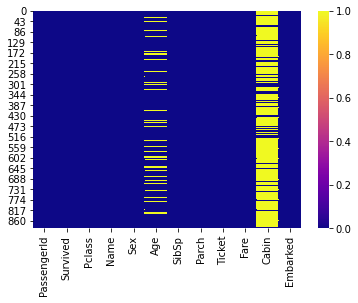

In [4]:
# Checking Null value presents
sns.heatmap(df.isnull(),cmap='plasma')

## Observation 

    They column Age and cabin having null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Observation : 

    Some categorical and obeject are present in datasets

In [6]:
# Statistical Summary 

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Spliting Numerical and categorical variable

df_num = df[['Age','SibSp','Parch','Fare']]
df_cat =df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

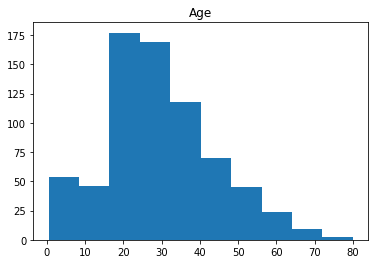

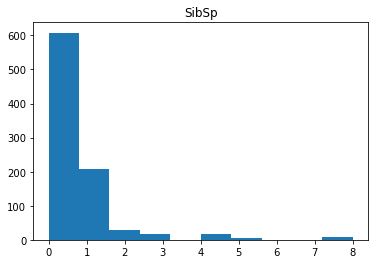

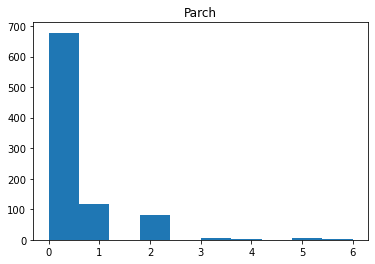

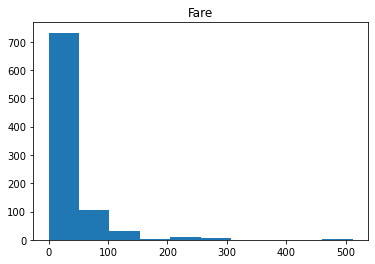

In [8]:
#Checking distribution for numerical variable

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

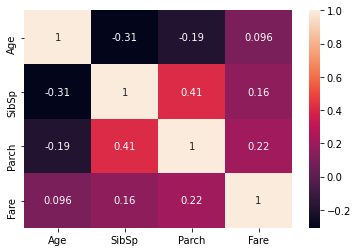

In [9]:
sns.heatmap(df_num.corr(),annot=True)

In [10]:
# pivot table
pd.pivot_table(df,index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


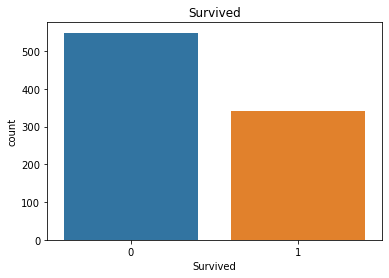

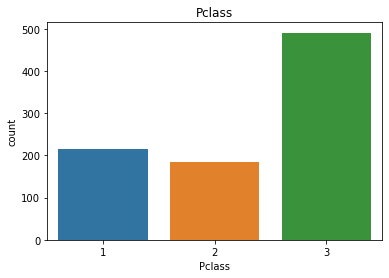

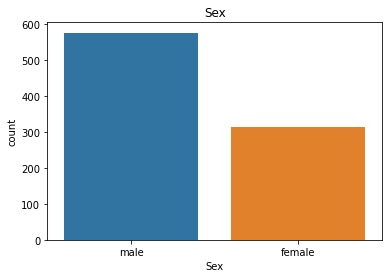

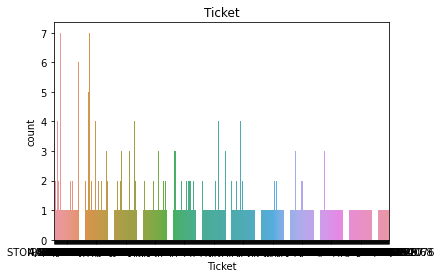

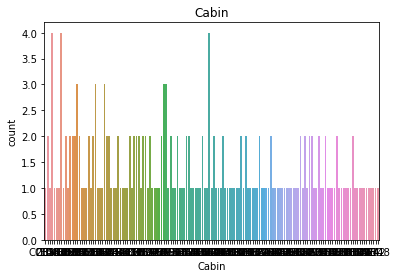

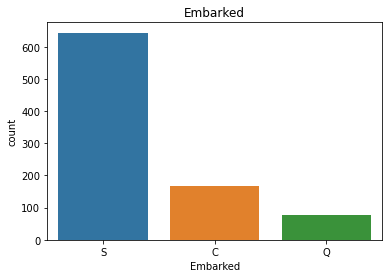

In [11]:
# Next we are analysing categorical variable

for i in df_cat.columns:
    plt.figure()
    sns.countplot(df[i])
    plt.title(i)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

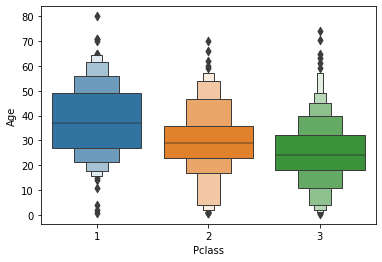

In [12]:
# Removing Null values
sns.boxenplot(x='Pclass',y='Age',data=df)

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

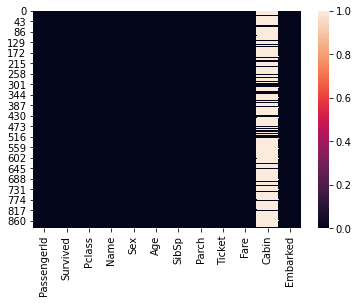

In [15]:
sns.heatmap(df.isnull())

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# Encoding the some of the categorical feature

le =LabelEncoder()

for i in ['Sex','Embarked']:
    df[i]=le.fit_transform(df[i].astype(str))

In [18]:
df.drop(['Name','Ticket'],inplace=True,axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,2
1,2,1,1,0,38.0,1,0,71.2833,C85,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,2
3,4,1,1,0,35.0,1,0,53.1000,C123,2
4,5,0,3,1,35.0,0,0,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,NaN,2
887,888,1,1,0,19.0,0,0,30.0000,B42,2
888,889,0,3,0,24.0,1,2,23.4500,NaN,2
889,890,1,1,1,26.0,0,0,30.0000,C148,0


## Training and Prediction

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
x=df.drop(['Survived','Cabin'],axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)
print("X train",x_train.shape)
print("X train",y_train.shape)
print("X train",x_test.shape)
print("X train",x_test.shape)

X train (694, 8)
X train (694,)
X train (197, 8)
X train (197, 8)


In [32]:
#Logistic model
lg =LogisticRegression()
lg.fit(x_train,y_train)
prec =lg.predict(x_test)

def model_performance(y_test,predic):
    print("Accuracy Score",accuracy_score(y_test,predic))
    print("--"*50)
    print("Classification Report\n",classification_report(y_test,predic))
    print("--"*50)
    print("Confusion Matrix\n",confusion_matrix(y_test,predic))
    
model_performance(y_test,prec)  


Accuracy Score 0.7766497461928934
----------------------------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       117
           1       0.75      0.68      0.71        80

    accuracy                           0.78       197
   macro avg       0.77      0.76      0.76       197
weighted avg       0.77      0.78      0.77       197

----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[99 18]
 [26 54]]


In [36]:
# Checking with all classification model

model =[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]

for m in model:
    m.fit(x_train,y_train)
    m_pred=m.predict(x_test)
    model_performance(y_test,m_pred)  
    

Accuracy Score 0.7461928934010152
----------------------------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       117
           1       0.68      0.70      0.69        80

    accuracy                           0.75       197
   macro avg       0.74      0.74      0.74       197
weighted avg       0.75      0.75      0.75       197

----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[91 26]
 [24 56]]
Accuracy Score 0.6091370558375635
----------------------------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.97      0.75       117
           1       0.67      0.07      0.13        80

    accuracy                           0.61       197
 

In [ ]:
# Logistic model working fine

In [43]:
from sklearn.metrics import roc_curve,roc_auc_score

In [44]:
y_prob =lg.predict_proba(x_test)[:,1]
y_prob

array([0.15341723, 0.17258738, 0.2249919 , 0.80228933, 0.52887556,
       0.84524365, 0.60872008, 0.11194121, 0.60045738, 0.61402525,
       0.19180866, 0.16045726, 0.51272563, 0.11803984, 0.15360202,
       0.85690575, 0.29074015, 0.70735447, 0.28060806, 0.19706721,
       0.12376092, 0.24022225, 0.53504972, 0.19490134, 0.17130725,
       0.12244263, 0.16233054, 0.22325688, 0.05462042, 0.61172207,
       0.23486234, 0.55619731, 0.34844468, 0.57944464, 0.11841021,
       0.16678641, 0.18015593, 0.57807592, 0.86576634, 0.19734418,
       0.18381618, 0.12246078, 0.2177023 , 0.21365988, 0.54383016,
       0.05971724, 0.10092696, 0.13446573, 0.11187031, 0.36825233,
       0.59361189, 0.86282199, 0.04831997, 0.48266231, 0.0871882 ,
       0.83962674, 0.11536786, 0.96307162, 0.64250164, 0.5435341 ,
       0.1434804 , 0.6967798 , 0.69046181, 0.17707497, 0.11477021,
       0.71962235, 0.23319522, 0.13609503, 0.12434484, 0.84579826,
       0.60604416, 0.95928631, 0.40026493, 0.87473009, 0.21816

In [45]:
fbr,tpr,threshold = roc_curve(y_test,y_prob)

Text(0, 0.5, 'True positive rate')

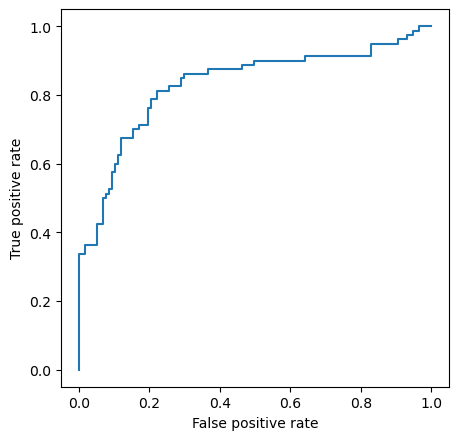

In [50]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fbr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [38]:
#Saving the model
import joblib

In [39]:
model_file =joblib.dump(lg,'model.obj')
model_file

['model.obj']

In [42]:
model_file=joblib.load('model.obj')